

# **Lista 04 Processamento Digital de Imagens**
Professora: Mylene Farias

Monitores: André da Costa e Lucas Althoff


---


In [3]:
import matplotlib.pyplot as plt #usei para mostrar o resultado, apenas. O meu cv2.imshow() não funciona 
import numpy as np
import cv2

#Problema 1: Restauração

Baixe as imagens ruidosas 
- [exemplo 1](https://drive.google.com/file/d/1SFIqWaTvkVj1Qcwf5LjJ09tG0dn-2fBS/view?usp=sharing)
- [exemplo 2](https://drive.google.com/file/d/19nnMY5SfeLqzL_xZ1a2bllPzSO08MXk3/view?usp=sharing)
- [exemplo 3](https://drive.google.com/file/d/1oybZ-bOEDPU31JT48HKheSOww4gCCskC/view?usp=sharing)
- [exemplo 4](https://drive.google.com/file/d/14yMA7JW-MKyLYntO7gmjXuOfa9RiOnzR/view?usp=sharing)
- [exemplo 5](https://drive.google.com/file/d/1ZFdcdg-mA91oo7fnIw2Hz523XfJNGGDl/view?usp=sharing)

Em seguida, implemente 5 filtros estatísticos (à sua escolha) do Capítulo 05  para remoção de ruído. Utilize os filtros implementados para remover o ruído em cada uma das imagens. Comente os resultados obtidos. Quando possível, descreva o tipo de ruído presente na imagem. 

**Obs: Só é permitido utilizar a biblioteca OpenCV e Numpy**

Baseado no histograma das imagens corrompidas com ruídos, podemos comparar com o histograma do ruído no livro de referência e deduzir analiticamente o tipo de ruído presente nas imagens. 

In [1]:

def mediana(imagem_path):
  M = 3
  N = 3
  imagem = cv2.imread(imagem_path, 0)
  altura, largura = imagem.shape
  imagem_out = np.zeros(shape=(altura, largura), dtype='uint8')    
  imagem_array = []
  x = M - int(M/2+1)
  y = N - int(N/2+1)
  for i in range(x, altura-x):
    for j in range(y, largura-y): 
      imagem_array = imagem[i-x:i+M-x, j-y:j+N-y].flat[0:M*N]
      imagem_array = sorted(imagem_array) 
      imagem_out[i, j] = imagem_array[int(len(imagem_array)/2)] #tipo do filtro
  
  return imagem_out

In [2]:

print('------------------------------------ Imagem original e Corrigida ---------------------------')
img_arr = ['exemplo1.jpg', 'exemplo-2.png', 'exemplo-3.jpg','exemplo-4.jpg','exemplo-5.jpg' ]
for img_path in img_arr:
  original = cv2.imread(img_path, 0)
  resultado = mediana(img_path)
  figsize=(20, 20)
  fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
  ax1.imshow(original, cmap = 'gray')
  plt.title('original')
  plt.axis('off')
  ax2.imshow(resultado, cmap = 'gray')
  plt.title('Corrigida')
  plt.axis('off')
  plt.show()

------------------------------------ Imagem original e Corrigida ---------------------------


NameError: ignored

As correções geradas pelo Filtro Mediano foram mais satisfatórias que as geradas nos outros filtros abaixo.

In [ ]:
#@title Filtro Mínimo
def minimo(imagem_path):
  M = 2
  N = 2
  imagem = cv2.imread(imagem_path, 0)
  altura, largura = imagem.shape
  imagem_out = np.zeros(shape=(altura, largura), dtype='uint8')    
  imagem_array = []
  x = M - int(M/2+1)
  y = N - int(N/2+1)
  for i in range(x, altura-x):
    for j in range(y, largura-y): 
      imagem_array = imagem[i-x:i+M-x, j-y:j+N-y].flat[0:M*N]
      imagem_array = sorted(imagem_array) 
      imagem_out[i, j] = imagem_array[0] #tipo do filtro
  return imagem_out

In [ ]:
#@title Imagens Corrigidas com o Filtro Mínimo
print('------------------------------------ Imagem original e Corrigida ---------------------------')
img_arr = ['exemplo1.jpg', 'exemplo-2.png', 'exemplo-3.jpg','exemplo-4.jpg','exemplo-5.jpg' ]
for img_path in img_arr:
  original = cv2.imread(img_path, 0)
  resultado = minimo(img_path)
  figsize=(20, 20)
  fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
  ax1.imshow(original, cmap = 'gray')
  plt.title('original')
  plt.axis('off')
  ax2.imshow(resultado, cmap = 'gray')
  plt.title('Corrigida')
  plt.axis('off')
  plt.show()

Foi feito um ajuste na máscara para trabalhar com uma máscara (M,N). O resultado foi melhor com M=N=2. O filtro mínimo talvez seja mais adequado para imagens que podem ser preenchidas com pontos escuros sem drástica alteração na composição. 


In [ ]:
#@title Filtro Máximo
def maximo(imagem_path):
  M = 2
  N = 2
  imagem = cv2.imread(imagem_path, 0)
  altura, largura = imagem.shape
  imagem_out = np.zeros(shape=(altura, largura), dtype='uint8')    
  imagem_array = []
  x = M - int(M/2+1)
  y = N - int(N/2+1)
  for i in range(x, altura-x):
    for j in range(y, largura-y): 
      imagem_array = imagem[i-x:i+M-x, j-y:j+N-y].flat[0:M*N]
      imagem_array = sorted(imagem_array) 
      imagem_out[i, j] = imagem_array[len(imagem_array)-1]  #tipo do filtro
  return imagem_out


In [ ]:
#@title Imagens Corrigidas com o Filtro Máximo
print('------------------------------------ Imagem original e Corrigida ---------------------------')
img_arr = ['exemplo1.jpg', 'exemplo-2.png', 'exemplo-3.jpg','exemplo-4.jpg','exemplo-5.jpg' ]
for img_path in img_arr:
  original = cv2.imread(img_path, 0)
  resultado = maximo(img_path)
  figsize=(20, 20)
  fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
  ax1.imshow(original, cmap = 'gray')
  plt.title('original')
  plt.axis('off')
  ax2.imshow(resultado, cmap = 'gray')
  plt.title('Corrigida')
  plt.axis('off')
  plt.show()

In [ ]:
#@title Filtro Ponto Médio
def pontomedio(imagem_path):

  M = 1
  N = 1
  imagem = cv2.imread(imagem_path, 0)
  altura, largura = imagem.shape
  imagem_out = np.zeros(shape=(altura, largura), dtype='uint8')    
  imagem_array = []
  x = M - int(M/2+1)
  y = N - int(N/2+1)
  for i in range(x, altura-x):
    for j in range(y, largura-y): 
      imagem_array = imagem[i-x:i+M-x, j-y:j+N-y].flat[0:M*N]
      imagem_array = sorted(imagem_array) 
      aux = (imagem_array[len(imagem_array)-1] + imagem_array[0])/2
      if aux > 255:
        imagem_out[i, j] = 255
      elif aux < 0:
        imagem_out[i, j] = 0
      else:
        imagem_out[i,j] = aux
  return imagem_out


In [ ]:
#@title Imagens Corrigidas com o Filtro Ponto Médio
print('------------------------------------ Imagem original e Corrigida ---------------------------')
img_arr = ['exemplo1.jpg', 'exemplo-2.png', 'exemplo-3.jpg','exemplo-4.jpg','exemplo-5.jpg' ]
for img_path in img_arr:
  original = cv2.imread(img_path, 0)
  resultado = pontomedio(img_path)
  figsize=(20, 20)
  fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
  ax1.imshow(original, cmap = 'gray')
  plt.title('original')
  plt.axis('off')
  ax2.imshow(resultado, cmap = 'gray')
  plt.title('Corrigida')
  plt.axis('off')
  plt.show()

Como podemos ver no exemplo acima, alguns filtros de correção podem até piorar o ruído presente na imagem. Esse resultado faz sentido matematicamente. 

In [ ]:
#@title Filtro Alfa
def alpha(imagem_path, d=1):
  M = 3
  N = 3
  imagem = cv2.imread(imagem_path, 0)
  altura, largura = imagem.shape
  imagem_out = np.zeros(shape=(altura, largura), dtype='uint8')    
  imagem_array = []
  x = M - int(M/2+1)
  y = N - int(N/2+1)
  for i in range(x, altura-x):
    for j in range(y, largura-y): 
      imagem_array = imagem[i-x:i+M-x, j-y:j+N-y].flat[0:M*N]
      imagem_array = sorted(imagem_array) 
      aux = (imagem_array[len(imagem_array)-1] + imagem_array[0])/2   
      aux = (1/(M*N - d))*sum(imagem_array)
      if aux > 255:
        imagem_out[i, j] = 255
      elif aux < 0:
        imagem_out[i, j] = 0
      else:
        imagem_out[i,j] = aux
  return imagem_out

In [ ]:
#@title Imagens Corrigidas com o Filtro Alpha
print('------------------------------------ Imagem original e Corrigida ---------------------------')
img_arr = ['exemplo1.jpg', 'exemplo-2.png', 'exemplo-3.jpg','exemplo-4.jpg','exemplo-5.jpg' ]
for img_path in img_arr:
  original = cv2.imread(img_path, 0)
  resultado = alpha(img_path, d=1)
  figsize=(20, 20)
  fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
  ax1.imshow(original, cmap = 'gray')
  plt.title('original')
  plt.axis('off')
  ax2.imshow(resultado, cmap = 'gray')
  plt.title('Corrigida')
  plt.axis('off')
  plt.show()

Esses 5 filtros estatísticos apresentados são consideravelmente de baixa complexidade e não tão efetivos para a recuperação completa de uma imagem. No livro de referência, o autor deixa isso explícito e ainda dá outras alternativas mais complexas (e de melhores resultados) para uma melhor recuperação. 

#Problema 2: Halftoning and Dithering

**1.1**
Implemente um algoritmo "halftoning" baseado em padrões de pontos. A figura abaixo mostra os padrões que podem ser utilizados para aproximar dez níveis de tons de cinza. Cada nível é representado por um padrão 3x3 de pontos brancos e pretos. Uma área de 3x3 pixels cheia de pontos pretos é uma aproximação de um nível de cinza preto ou '0'. Da mesma forma, uma área de 3x3 pixels de pontos brancos é uma aproximação do nível de cinza branco ou '9'. Os outros padrões são aproximações dos níveis de cinza intermediários (entre os dois extremos '0' e '9'). 

Teste o seu programa com duas imagens de sua preferência. Observe que cada pixel na imagem de entrada irá corresponder a um padão de 3x3 pixels na imagem impressa.  Desta forma, a resolução espacial será reduzida a 33% da resolução espacial da imagem original. Imprima o resultado da sua implementação. 

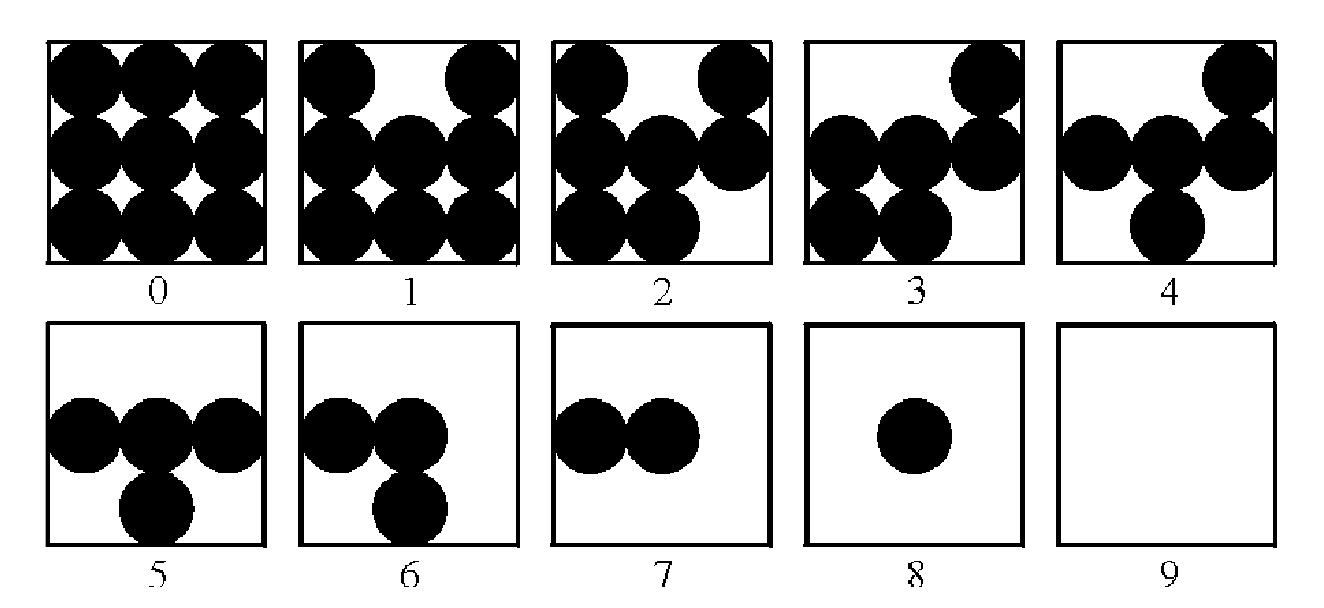

In [ ]:
#@title Halftoning
def halftoning(img,array):    

    altura, largura = img.shape[0],img.shape[1]
    M,N = img.shape[0]*3,img.shape[1]*3
    halftoned = np.zeros(shape=(M,N), dtype=np.uint8)

    for i in range(altura):

        for j in range(largura):

            aux = int((3*3*img[i, j])/255)

            for x in range(3):


                for y in range(3):

                  
                    halftoned[x+i*3, y+j*3] = 255*arr[aux][x][y]


    return halftoned

In [ ]:
img_array = ['exemplo1.jpg', 'exemplo-2.png','exemplo-3.jpg','exemplo-4.jpg' ]
for img_path in img_array:

  arr = [[[0,0,0],[0,0,0],[0,0,0]],
          [[0,1,0],[0,0,0],[0,0,0]],
          [[0,1,0],[0,0,0],[0,0,1]],
          [[1,1,0],[0,0,0],[0,0,1]],
          [[1,1,0],[0,0,0],[1,0,1]],
          [[1,1,1],[0,0,0],[1,0,1]],
          [[1,1,1],[0,0,1],[1,0,1]],
          [[1,1,1],[0,0,1],[1,1,1]],
          [[1,1,1],[1,0,1],[1,1,1]],
          [[1,1,1],[1,1,1],[1,1,1]]] #matriz de halftoning de acordo com a imagem 

  img =  cv2.imread(img_path, 0)
  resultado = halftoning(img,arr)
  figsize=(20, 20)
  fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
  ax1.imshow(img, cmap = 'gray')
  plt.title('original')
  plt.axis('off')
  ax2.imshow(resultado, cmap = 'gray')
  plt.title('Halftoned Image \n')
  plt.axis('off')
  plt.show()


**2.2**  Como pode ser observado na questão anterior, o halftoning descrito em 2.1 não é capaz de representar areas da imagem com transições suaves de intensidade, gerando artefatos de falsos contornos. Uma maneira de corrigir este problema é adicionar ruído (branco) a imagem antes da codificação. Repita o exemplo anterior adicionando ruído às duas imagens antes da sua conversão. Imprima os resultados e comente as diferenças. 

In [ ]:
def whitenoise(image):
  row,col = image.shape[0], image.shape[1]
  mean = 2
  var = 3
  sigma = var**4
  gauss = np.random.normal(mean,sigma,(row,col))
  gauss = gauss.reshape(row,col)
  noisy = image + gauss
  return noisy

#Salva as imagens com Ruído

image = cv2.imread('exemplo1.jpg', 0)
noised = whitenoise(image)
cv2.imwrite('noised_exemplo1.png', noised)

image = cv2.imread('exemplo-2.png', 0)
noised = whitenoise(image)
cv2.imwrite('noised_exemplo2.png', noised)

image = cv2.imread('exemplo-3.jpg', 0)
noised = whitenoise(image)
cv2.imwrite('noised_exemplo3.png', noised)

image = cv2.imread('exemplo-4.jpg', 0)
noised = whitenoise(image)
cv2.imwrite('noised_exemplo4.png', noised)

True

Compara os resultados 

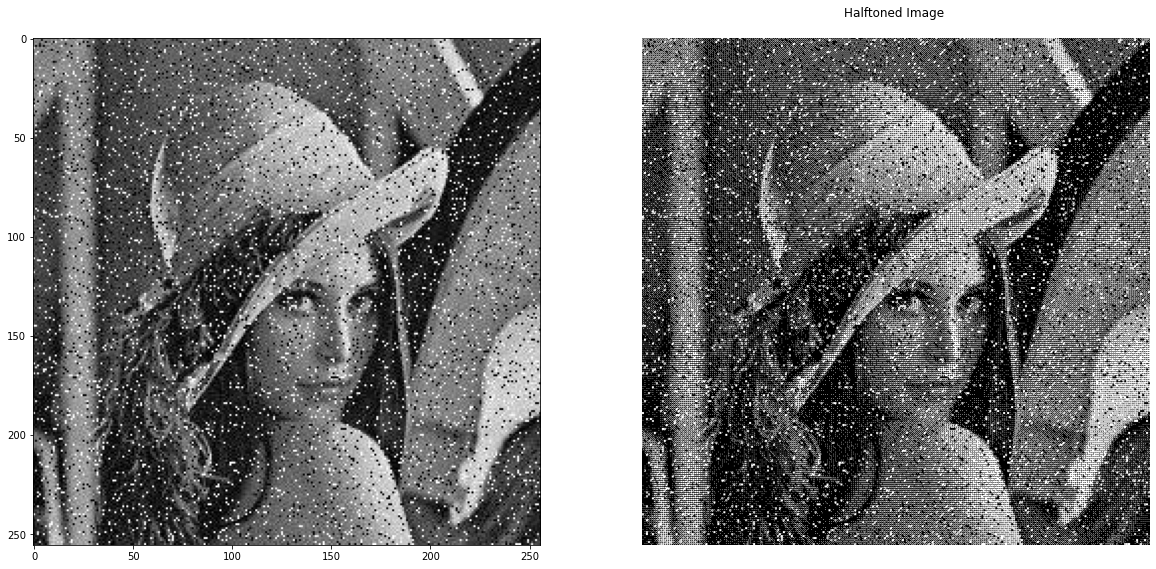

In [ ]:
img =  cv2.imread('exemplo1.jpg', 0)
resultado = halftoning(img,arr)
figsize=(20, 20)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
ax1.imshow(img, cmap = 'gray')
plt.title('original')
plt.axis('off')
ax2.imshow(resultado, cmap = 'gray')
plt.title('Halftoned Image \n')
plt.axis('off')
plt.show()

img =  cv2.imread('noised_exemplo1.png', 0)
resultado = halftoning(img,arr)
figsize=(20, 20)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
ax1.imshow(img, cmap = 'gray')
plt.title('Com ruido')
plt.axis('off')
ax2.imshow(resultado, cmap = 'gray')
plt.title('Halftoned Image \n')
plt.axis('off')
plt.show()

print("---------------------------------------------------------------------------------------------------------")

img =  cv2.imread('exemplo-2.png', 0)
resultado = halftoning(img,arr)
figsize=(20, 20)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
ax1.imshow(img, cmap = 'gray')
plt.title('original')
plt.axis('off')
ax2.imshow(resultado, cmap = 'gray')
plt.title('Halftoned Image \n')
plt.axis('off')
plt.show()

img =  cv2.imread('noised_exemplo2.png', 0)
resultado = halftoning(img,arr)
figsize=(20, 20)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
ax1.imshow(img, cmap = 'gray')
plt.title('Com ruido')
plt.axis('off')
ax2.imshow(resultado, cmap = 'gray')
plt.title('Halftoned Image \n')
plt.axis('off')
plt.show()

print("---------------------------------------------------------------------------------------------------------")

img =  cv2.imread('exemplo-3.jpg', 0)
resultado = halftoning(img,arr)
figsize=(20, 20)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
ax1.imshow(img, cmap = 'gray')
plt.title('original')
plt.axis('off')
ax2.imshow(resultado, cmap = 'gray')
plt.title('Halftoned Image \n')
plt.axis('off')
plt.show()

img =  cv2.imread('noised_exemplo3.png', 0)
resultado = halftoning(img,arr)
figsize=(20, 20)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
ax1.imshow(img, cmap = 'gray')
plt.title('Com ruido')
plt.axis('off')
ax2.imshow(resultado, cmap = 'gray')
plt.title('Halftoned Image \n')
plt.axis('off')
plt.show()

print("---------------------------------------------------------------------------------------------------------")

img =  cv2.imread('exemplo-4.jpg', 0)
resultado = halftoning(img,arr)
figsize=(20, 20)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
ax1.imshow(img, cmap = 'gray')
plt.title('original')
plt.axis('off')
ax2.imshow(resultado, cmap = 'gray')
plt.title('Halftoned Image \n')
plt.axis('off')
plt.show()

img =  cv2.imread('noised_exemplo4.png', 0)
resultado = halftoning(img,arr)
figsize=(20, 20)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
ax1.imshow(img, cmap = 'gray')
plt.title('Com ruido')
plt.axis('off')
ax2.imshow(resultado, cmap = 'gray')
plt.title('Halftoned Image \n')
plt.axis('off')
plt.show()

**2.3**  Uma técnica de representação que obtém melhores resultados que o halftoning é o *dithering*.  No dithering, cada elemento de um bloco da imagem é quantizado (codificado) utilizando o padrão de dither como limiar (*threshold*). 

A técnica consiste em encontrar o valor truncado mais próximo (ou a cor disponível mais próxima). Em seguida, calcula-se a diferença entre o valor original e este valor truncado. Este erro é distribuído entre os pixels (futuros) vizinhos. 

Mais especificamente, podemos expressar a distribuição do erro entre os vizinhos de uma imagem com padrões (ou filtros). Os valores do padrão de *dither* são fixos, mas tipicamente diferentes entre si. 

O padrão abaixo é o padrão de dithering de **Floyd-Steinberg**:
 ```
       x  7
    3  5  1
 ```
Neste padrão, o x representa o pixel que está sendo processado e os números (pesos) representam a proporção da distribuição em cada uma das posições. Nesta expressão, o pixel imediatamente à direita de x recebe 7/16 (o valor 16 vem do fato da soma dos pesos ter este valor), o pixel imediatamente abaixo do x recebe 5/16 do erro e os pixels adjacentes diagonalmente recebem 3/16 e 1/16. 

Para obter a imagem binária com ditheiring, processamos a imagem da esquerda-para-direita e de cima-para-baixo. Vamos considerar uma imagem com valores normalizados entre 0 e 1. Para cada pixel da imagem I(x,y), primeiramente arredondamos o pixel para o valor 'branco' (1 ou 255) ou 'preto' (0) que seja mais próximo:

```
if (I[x][y] < 0.5) 
     P[x][y]=0.0;
else 
    P[x][y]=1.0;
```


Após o arredondamento, calculamos o erro para o valor original:

``` erro= P[x][y] - I[x][y] ```

 Em seguida o erro é distribuído entre os pixels vizinhos:
 ```
I[x][y+1] = I[x][y+1] + erro* 7/16;
I[x+1][y-1] = I[x+1][y-1] + erro* 3/16;
I[x+1][y] = I[x+1][y] + erro* 5/16;
I[x+1][y+1] = I[x+1][y+1] + erro* 1/16;
 ```
O mesmo procedimento pode ser utilizado para implementação do algoritmo de dithering de **Stucki** que tem o seguinte padrão:

 ```
      x 8 4
  2 4 8 4 2
  1 2 4 2 1
 ```
Implemente o algoritmo de dithering Floyd-Steinberg e o de  Stucki  descritos acima. Teste o seu programa com duas imagens de sua preferência e compare os resultados com os obtidos em 2.2 e 2.1. 


**Floyd-Steinberg**:
 ```
       x  7
    3  5  1
```

In [ ]:
#@title Floyd Steinberg Dithering
def FloydSteinbergDithering(img_path, threshold):

    def setup(argumento):
      if argumento > 255: valor = 255
      if argumento < 0: argumento = 0
      return argumento
    
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    height, width = img.shape
    ditherizada = np.zeros(shape=(height, width), dtype=np.uint8)
    ditherizada = img
    
    for i in range(1, height-1):
        for j in range(1, width-1):
            old_pixel = img[i, j]
            new_pixel = np.round(threshold * old_pixel/255.0) * (255/threshold)
            img[i, j] = new_pixel
            quant_error_p = old_pixel - new_pixel

            ditherizada[i, j+1] = setup(img[i, j+1] + quant_error_p * 7/16)
            ditherizada[i+1, j-1] = setup(img[i+1, j-1] + quant_error_p * 3/16)
            ditherizada[i+1, j] = setup(img[i+1, j] + quant_error_p * 5/16)
            ditherizada[i+1, j+1] = setup(img[i+1, j+1] + quant_error_p * 1/16)
          
    return ditherizada.astype(np.uint8)

      

  

In [ ]:
img_arr = ['exemplo1.jpg', 'lena.png', 'zelda.png']
for img in img_arr:
  original = cv2.imread(img, 0)
  resultado = FloydSteinbergDithering(img,threshold=1)
  figsize=(20, 20)
  fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
  ax1.imshow(original, cmap = 'gray')
  plt.title('original')
  plt.axis('off')
  ax2.imshow(resultado, cmap = 'gray')
  plt.title('Floyd Steinberg Dilthering')
  plt.axis('off')
  plt.show()

**Stucki**:

 ```
      x 8 4
  2 4 8 4 2
  1 2 4 2 1
 ```

In [ ]:
#@title Stucki Dithering
def StuckiDithering(img_path, threshold):

    def setup(argumento):
      if argumento > 255: valor = 255
      if argumento < 0: argumento = 0
      return argumento
    
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    height, width = img.shape
    ditherizada = np.zeros(shape=(height, width), dtype=np.uint8)
    ditherizada = img
    
    for i in range(1, height-2):
        for j in range(1, width-2):
            pixel0 = img[i, j]
            pixel1 = np.round(threshold * pixel0/255.0) * (255/threshold)
            img[i, j] = pixel1
            nError = pixel0 - pixel1
            ditherizada[i, j+1] = setup(img[i, j+1] + nError * 8/42)
            ditherizada[i, j+2] = setup(img[i, j+2] + nError * 4/42)  
            ditherizada[i+1, j-2] = setup(img[i+1, j-2] + nError * 2/42)
            ditherizada[i+1, j-1] = setup(img[i+1, j-1] + nError * 4/42)
            ditherizada[i+1, j] = setup(img[i+1, j] + nError * 8/42)
            ditherizada[i+1, j+1] = setup(img[i+1, j+1] + nError * 4/42)
            ditherizada[i+1, j+2] = setup(img[i+1, j+2] + nError * 2/42)      
            ditherizada[i+2, j-2] = setup(img[i+2, j-2] + nError * 1/42)
            ditherizada[i+2, j-1] = setup(img[i+2, j-1] + nError * 2/42)
            ditherizada[i+2, j] = setup(img[i+2, j] + nError * 4/42)
            ditherizada[i+2, j+1] = setup(img[i+2, j+1] + nError * 2/42)
            ditherizada[i+2, j+2] = setup(img[i+2, j+2] + nError * 1/42)
          
    return ditherizada.astype(np.uint8)
      

  

In [ ]:
img_arr = ['exemplo1.jpg', 'lena.png', 'zelda.png']
for img in img_arr:
  original = cv2.imread(img, 0)
  resultado = StuckiDithering(img,threshold=1)
  figsize=(20, 20)
  fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
  ax1.imshow(original, cmap = 'gray')
  plt.title('original')
  plt.axis('off')
  ax2.imshow(resultado, cmap = 'gray')
  plt.title('Stucki Dilthering')
  plt.axis('off')
  plt.show()

Como pôde-se observar, os resultados apresentados são bem semelhantes. No entanto, ainda é visualmente notável que o processamento com o algorítmo de Stucki apresenta resultados mais satisfatórios que os apresentados no algorítmo de Floyd, embora que o mesmo seja mais complexo para ser feito. 